Community 1: ['N0', 'N1', 'N2']
Community 2: ['N10', 'N100', 'N11', 'N12', 'N13', 'N14', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N3', 'N30', 'N31', 'N32', 'N33', 'N34', 'N35', 'N36', 'N39', 'N4', 'N40', 'N41', 'N42', 'N43', 'N45', 'N46', 'N47', 'N48', 'N49', 'N5', 'N50', 'N51', 'N52', 'N54', 'N55', 'N59', 'N6', 'N60', 'N61', 'N62', 'N63', 'N64', 'N65', 'N66', 'N67', 'N68', 'N69', 'N7', 'N70', 'N71', 'N72', 'N75', 'N76', 'N77', 'N78', 'N79', 'N8', 'N80', 'N81', 'N82', 'N83', 'N84', 'N85', 'N86', 'N87', 'N88', 'N89', 'N9', 'N90', 'N91', 'N92', 'N93', 'N94', 'N95', 'N96', 'N97', 'N98', 'N99']
Community 3: ['N16', 'N17']
Community 4: ['N56', 'N57']
Community 5: ['N73', 'N74']


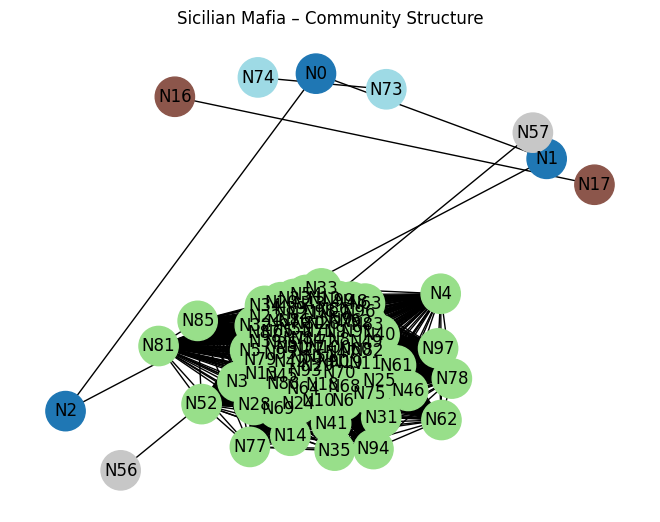

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("Meetings.csv", sep=r"\s+", header=None)
df.columns = ["u", "v", "w"]

G = nx.Graph()

for _, r in df.iterrows():
    G.add_edge(r["u"], r["v"], weight=r["w"])

for u, v, score in nx.adamic_adar_index(G):
    if score > 0:
        if G.has_edge(u, v):
            G[u][v]["weight"] += score
        else:
            G.add_edge(u, v, weight=score)

for u, v, score in nx.resource_allocation_index(G):
    if score > 0:
        if G.has_edge(u, v):
            G[u][v]["weight"] += score
        else:
            G.add_edge(u, v, weight=score)

from networkx.algorithms.community import asyn_lpa_communities
communities = list(asyn_lpa_communities(G, weight="weight", seed=42))

for i, c in enumerate(communities):
    print(f"Community {i+1}:", sorted(c))

color_map = {}
for i, c in enumerate(communities):
    for n in c:
        color_map[n] = i

node_colors = [color_map.get(n, -1) for n in G.nodes()]

pos = nx.spring_layout(G, seed=42, k=2.5, iterations=100)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=800,
    cmap=plt.cm.tab20
)

plt.title("Sicilian Mafia – Community Structure")
plt.show()
